<a href="https://colab.research.google.com/github/aguiarmicael/Micael-UVVHTML5/blob/master/live_delta_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the deltalake library

In [ ]:
!pip install deltalake # install the python library for delta
!mkdir /lake # create a directory call lake
!git clone https://github.com/leslliesayrus/owshq-pandas-delta-live.git # take the data from github
!cp -r /content/owshq-pandas-delta-live/data /lake # copy csv files into the lake folder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 65.0 MB/s eta 0:00:00
Cloning into 'owshq-pandas-delta-live'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 48 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (48/48), 343.71 KiB | 13.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
# Installing Apache Spark into Google Colab
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip -q install findspark

# Delta tables with Pandas

Importing the libraries pandas and deltalake

In [ ]:
import pandas as pd
from deltalake import DeltaTable
from deltalake.writer import write_deltalake
import deltalake

How to read a csv file

In [ ]:
df = pd.read_csv("/lake/data/data_1.csv")

`head()` show the 5 first lines of the dataframe

In [ ]:
df.head()

,id,name,city,age,salary,score
0,1,James Stewart,Las Vegas,56,4530,490
1,2,Alejandro Barrett,Las Vegas,52,4734,422
2,3,Jim Evans,New York,46,2171,188
3,4,Tina Kirk,Los Angeles,26,3531,900
4,5,Morgan Bailey,Las Vegas,21,1617,202


`describe()` makes a statistical analysis for all numeric columns of the dataframe (it's like mean, median, standard deviation, count, min and max)


In [ ]:
df.describe()

,id,age,salary,score
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,41.500000,3453.400000,433.700000
std,3.02765,15.042532,1124.941302,221.185217
min,1.00000,21.000000,1617.000000,188.000000
25%,3.25000,28.250000,2529.500000,236.750000
50%,5.50000,40.500000,3666.000000,438.500000
75%,7.75000,55.000000,4424.250000,541.750000
max,10.00000,62.000000,4734.000000,900.000000


Number of rows and columns:

In [ ]:
df.shape

(10, 6)

In [ ]:
df['age']

0    56
1    52
2    46
3    26
4    21
5    62
6    35
7    58
8    27
9    32
Name: age, dtype: int64

Tranform "New York" in "new_york"

In [ ]:
df['city_partition'] = df['city'].str.lower().str.replace(' ', '_')

In [ ]:
df.head(3)

,id,name,city,age,salary,score,city_partition
0,1,James Stewart,Las Vegas,56,4530,490,las_vegas
1,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
2,3,Jim Evans,New York,46,2171,188,new_york


Writing a pandas DataFrame in Delta:

In [ ]:
write_deltalake('/lake/delta_table', df,
                description= 'dataframe created to demonstraction of Delta table with Pandas',
                partition_by= ['city_partition'])

Reading a Delta Table with Pandas:

In [ ]:
dataframe = DeltaTable('/lake/delta_table').to_pandas()
# dataframe.set_index('id', inplace = True)
dataframe.head()

,id,name,city,age,salary,score,city_partition
0,1,James Stewart,Las Vegas,56,4530,490,las_vegas
1,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
2,5,Morgan Bailey,Las Vegas,21,1617,202,las_vegas
3,6,David James,Las Vegas,62,4107,594,las_vegas
4,7,Kelli Murphy,Las Vegas,35,4727,455,las_vegas


In [ ]:
DeltaTable('/lake/delta_table').version()

2

# Metadata

In [ ]:
DeltaTable('/lake/delta_table')

DeltaTable()

In [ ]:
print(DeltaTable('/lake/delta_table').metadata())

Metadata(id: 6ce30549-8f24-4a2b-b075-660bebcc7ac0, name: None, description: dataframe created to demonstraction of Delta table with Pandas, partition_columns: ['city_partition'], created_time: 1692142742018, configuration: {})


In [ ]:
DeltaTable('/lake/delta_table').schema().to_pyarrow()

id: int64
name: string
city: string
age: int64
salary: int64
score: int64
city_partition: string

In [ ]:
DeltaTable('/lake/delta_table').history()

[{'timestamp': 1692142742018,
  'operation': 'CREATE TABLE',
  'operationParameters': {'metadata': '{"configuration":{},"created_time":1692142742018,"description":"dataframe created to demonstraction of Delta table with Pandas","format":{"options":{},"provider":"parquet"},"id":"6ce30549-8f24-4a2b-b075-660bebcc7ac0","name":null,"partition_columns":["city_partition"],"schema":{"fields":[{"metadata":{},"name":"id","nullable":true,"type":"long"},{"metadata":{},"name":"name","nullable":true,"type":"string"},{"metadata":{},"name":"city","nullable":true,"type":"string"},{"metadata":{},"name":"age","nullable":true,"type":"long"},{"metadata":{},"name":"salary","nullable":true,"type":"long"},{"metadata":{},"name":"score","nullable":true,"type":"long"},{"metadata":{},"name":"city_partition","nullable":true,"type":"string"}],"type":"struct"}}',
   'protocol': '{"minReaderVersion":1,"minWriterVersion":1}',
   'location': 'file:///lake/delta_table',
   'mode': 'ErrorIfExists'},
  'clientVersion': 'd

In [ ]:
DeltaTable('/lake/delta_table').get_add_actions(flatten=True).to_pandas()

,path,size_bytes,modification_time,data_change,partition.city_partition,num_records,null_count.id,min.id,max.id,null_count.name,...,max.city,null_count.age,min.age,max.age,null_count.salary,min.salary,max.salary,null_count.score,min.score,max.score
0,city_partition=las_vegas/0-f65c985d-9f61-4a62-...,5220,2023-08-15 23:39:02.000,True,las_vegas,7,0,1,9,0,...,Las Vegas,0,21,62,0,1617,4734,0,202,594
1,city_partition=new_york/0-f65c985d-9f61-4a62-8...,4999,2023-08-15 23:39:02.009,True,new_york,2,0,3,10,0,...,New York,0,32,46,0,2171,3801,0,188,317
2,city_partition=los_angeles/0-f65c985d-9f61-4a6...,4955,2023-08-15 23:39:02.017,True,los_angeles,1,0,4,4,0,...,Los Angeles,0,26,26,0,3531,3531,0,900,900


# Time Travel

In [ ]:
df_02 = pd.read_csv("/lake/data/data_2.csv")
df_02['city_partition'] = df_02['city'].str.lower().str.replace(' ', '_')
df_02.shape

(10, 7)

In [ ]:
df_02.head(3)

,id,name,city,age,salary,score,city_partition
0,11,Dr. Roberta West MD,Las Vegas,43,3101,656,las_vegas
1,12,Cody Sanchez,New York,27,2262,665,new_york
2,13,Jill Williams,Las Vegas,35,4800,950,las_vegas


In [ ]:
write_deltalake('/lake/delta_table', df_02,
                mode = 'append',
                partition_by= ['city_partition'])

In [ ]:
DeltaTable('/lake/delta_table', version = 0).to_pandas()

,id,name,city,age,salary,score,city_partition
0,1,James Stewart,Las Vegas,56,4530,490,las_vegas
1,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
2,5,Morgan Bailey,Las Vegas,21,1617,202,las_vegas
3,6,David James,Las Vegas,62,4107,594,las_vegas
4,7,Kelli Murphy,Las Vegas,35,4727,455,las_vegas
5,8,Ashley Vasquez,Las Vegas,58,2401,210,las_vegas
6,9,Lisa Bruce,Las Vegas,27,2915,559,las_vegas
7,3,Jim Evans,New York,46,2171,188,new_york
8,10,Keith Thompson,New York,32,3801,317,new_york
9,4,Tina Kirk,Los Angeles,26,3531,900,los_angeles


In [ ]:
df_03 = pd.read_csv("/lake/data/data_3.csv")
df_03['city_partition'] = df_03['city'].str.lower().str.replace(' ', '_')
write_deltalake('/lake/delta_table', df_03,
                mode = 'append',
                partition_by= ['city_partition'])

To access the delta table with datetime, we use the attribute `load_with_datetime` and set the timestamp of the moment that you want to access.

This parameter accepts the timestamp style: RFC 3339 and SO 8601 \
You can see the examples on this site: https://www.utctime.net/

In [ ]:
df_time = DeltaTable('/lake/delta_table')
df_time.load_with_datetime('2023-08-15T23:40:11+00:00')
df_time = df_time.to_pandas()
df_time

,id,name,city,age,salary,score,city_partition
0,1,James Stewart,Las Vegas,56,4530,490,las_vegas
1,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
2,5,Morgan Bailey,Las Vegas,21,1617,202,las_vegas
3,6,David James,Las Vegas,62,4107,594,las_vegas
4,7,Kelli Murphy,Las Vegas,35,4727,455,las_vegas
5,8,Ashley Vasquez,Las Vegas,58,2401,210,las_vegas
6,9,Lisa Bruce,Las Vegas,27,2915,559,las_vegas
7,3,Jim Evans,New York,46,2171,188,new_york
8,10,Keith Thompson,New York,32,3801,317,new_york
9,4,Tina Kirk,Los Angeles,26,3531,900,los_angeles


In [ ]:
DeltaTable('/lake/delta_table').get_add_actions(flatten=True).to_pandas()

,path,size_bytes,modification_time,data_change,partition.city_partition,num_records,null_count.id,min.id,max.id,null_count.name,...,max.city,null_count.age,min.age,max.age,null_count.salary,min.salary,max.salary,null_count.score,min.score,max.score
0,city_partition=las_vegas/0-f65c985d-9f61-4a62-...,5220,2023-08-15 23:39:02.000,True,las_vegas,7,0,1,9,0,...,Las Vegas,0,21,62,0,1617,4734,0,202,594
1,city_partition=new_york/0-f65c985d-9f61-4a62-8...,4999,2023-08-15 23:39:02.009,True,new_york,2,0,3,10,0,...,New York,0,32,46,0,2171,3801,0,188,317
2,city_partition=los_angeles/0-f65c985d-9f61-4a6...,4955,2023-08-15 23:39:02.017,True,los_angeles,1,0,4,4,0,...,Los Angeles,0,26,26,0,3531,3531,0,900,900
3,city_partition=las_vegas/1-bda59d18-3c4e-4712-...,5147,2023-08-15 23:49:20.621,True,las_vegas,4,0,11,19,0,...,Las Vegas,0,35,49,0,3101,4994,0,212,950
4,city_partition=new_york/1-bda59d18-3c4e-4712-a...,5095,2023-08-15 23:49:20.632,True,new_york,4,0,12,20,0,...,New York,0,20,61,0,2262,4876,0,301,665
5,city_partition=los_angeles/1-bda59d18-3c4e-471...,5020,2023-08-15 23:49:20.641,True,los_angeles,2,0,15,16,0,...,Los Angeles,0,40,58,0,3384,4277,0,569,833
6,city_partition=los_angeles/2-66ed7fb1-3fd6-411...,4976,2023-08-15 23:52:23.926,True,los_angeles,1,0,21,21,0,...,Los Angeles,0,20,20,0,4721,4721,0,517,517
7,city_partition=new_york/2-66ed7fb1-3fd6-411d-9...,5085,2023-08-15 23:52:23.936,True,new_york,4,0,22,30,0,...,New York,0,28,53,0,1514,4088,0,304,971
8,city_partition=las_vegas/2-66ed7fb1-3fd6-411d-...,5142,2023-08-15 23:52:23.942,True,las_vegas,5,0,23,28,0,...,Las Vegas,0,23,56,0,1795,4912,0,148,758


# Schema Reiforcement

In [ ]:
df_time

,id,name,city,age,salary,score,city_partition
0,1,James Stewart,Las Vegas,56,4530,490,las_vegas
1,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
2,5,Morgan Bailey,Las Vegas,21,1617,202,las_vegas
3,6,David James,Las Vegas,62,4107,594,las_vegas
4,7,Kelli Murphy,Las Vegas,35,4727,455,las_vegas
5,8,Ashley Vasquez,Las Vegas,58,2401,210,las_vegas
6,9,Lisa Bruce,Las Vegas,27,2915,559,las_vegas
7,3,Jim Evans,New York,46,2171,188,new_york
8,10,Keith Thompson,New York,32,3801,317,new_york
9,4,Tina Kirk,Los Angeles,26,3531,900,los_angeles


In [ ]:
df_time.loc[0]=["Jim Evans",	"New York",	"46c", 200, 500,"new_york"]

ValueError: ignored

In [ ]:
df_time.head(3)

,name,city,age,city_partition
0,Jim Evans,New York,46c,new_york
1,Keith Thompson,New York,32,new_york
2,James Stewart,Las Vegas,56,las_vegas


In [ ]:
df_time.dtypes

name              object
city              object
age               object
city_partition    object
dtype: object

In [ ]:
write_deltalake('/lake/delta_table', df_time,
                mode = 'append',
                partition_by= ['city_partition'])

ArrowTypeError: ignored

In [ ]:
df_03['new_columns'] = df_03['age'] * 2
df_03.head(3)

,name,city,age,city_partition,new_columns
0,Cindy Taylor,Los Angeles,20,los_angeles,40
1,Megan Smith,New York,28,new_york,56
2,Jeffrey Rodriguez,Las Vegas,51,las_vegas,102


In [ ]:
write_deltalake('/lake/delta_table', df_03,
                mode = 'append',
                partition_by= ['city_partition'])

ValueError: ignored

# Changed Data Feed - CDF

In [ ]:
DeltaTable("/lake/delta_table", version = 0).file_uris()

['/lake/delta_table/city_partition=las_vegas/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=new_york/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet']

In [ ]:
currently_version = DeltaTable("/lake/delta_table").version()
currently_version

2

In [ ]:
penultimate_version = currently_version - 1
penultimate_version

1

In [ ]:
files_currently_version = DeltaTable("/lake/delta_table", version = currently_version).file_uris()
files_currently_version

['/lake/delta_table/city_partition=las_vegas/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=new_york/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet',
 '/lake/delta_table/city_partition=new_york/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet']

In [ ]:
files_penultimate_version = DeltaTable("/lake/delta_table", version = penultimate_version).file_uris()
files_penultimate_version

['/lake/delta_table/city_partition=las_vegas/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=new_york/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-f65c985d-9f61-4a62-89c4-a6e3646ffee2-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet']

In [ ]:
diferential_files = [i for i in files_currently_version if i not in files_penultimate_version]
diferential_files

['/lake/delta_table/city_partition=los_angeles/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet',
 '/lake/delta_table/city_partition=new_york/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/2-66ed7fb1-3fd6-411d-9851-9c4c25e934a4-0.parquet']

In [ ]:
df_differential = pd.read_parquet(diferential_files)
df_differential.head(3)

,id,name,city,age,salary,score,city_partition
0,21,Cindy Taylor,Los Angeles,20,4721,517,los_angeles
1,22,Megan Smith,New York,28,2912,971,new_york
2,27,Carl Anthony,New York,29,2313,752,new_york


In [ ]:
def read_diffential(version_new, version_old):
  files_new_version = DeltaTable("/lake/delta_table", version = version_new).file_uris()
  files_old_version = DeltaTable("/lake/delta_table", version = version_old).file_uris()

  files = [i for i in files_new_version if i not in files_old_version]
  return files

In [ ]:
read_diffential(1,0)

['/lake/delta_table/city_partition=las_vegas/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/1-bda59d18-3c4e-4712-ac8b-1c7c7391db60-0.parquet']

# Tests with Apache Spark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
### import Spark libraries
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

### spark package maven coordinates - in case you are loading more than just delta
spark_packages_list = [
    'io.delta:delta-core_2.12:2.2.0',
]
spark_packages = ",".join(spark_packages_list)

### SparkSession
spark = (
    SparkSession.builder
    .config("spark.jars.packages", spark_packages)
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")
    .getOrCreate()
)

In [ ]:
df_spark = spark.read.format("delta").load("/lake/delta_table")

In [ ]:
df_spark.show()

+---+-----------------+---------+---+------+-----+--------------+
| id|             name|     city|age|salary|score|city_partition|
+---+-----------------+---------+---+------+-----+--------------+
|  1|    James Stewart|Las Vegas| 56|  4530|  490|     las_vegas|
|  2|Alejandro Barrett|Las Vegas| 52|  4734|  422|     las_vegas|
|  5|    Morgan Bailey|Las Vegas| 21|  1617|  202|     las_vegas|
|  6|      David James|Las Vegas| 62|  4107|  594|     las_vegas|
|  7|     Kelli Murphy|Las Vegas| 35|  4727|  455|     las_vegas|
|  8|   Ashley Vasquez|Las Vegas| 58|  2401|  210|     las_vegas|
|  9|       Lisa Bruce|Las Vegas| 27|  2915|  559|     las_vegas|
| 23|Jeffrey Rodriguez|Las Vegas| 51|  2733|  758|     las_vegas|
| 24|     Daniel Moody|Las Vegas| 52|  1795|  527|     las_vegas|
| 25|    Donald Juarez|Las Vegas| 23|  4659|  148|     las_vegas|
| 26|      Jessica Lam|Las Vegas| 56|  4912|  336|     las_vegas|
| 28|   Kelly Franklin|Las Vegas| 35|  4808|  708|     las_vegas|
| 12|     

In [ ]:
df_spark.createOrReplaceTempView("df_spark")

In [ ]:
df_spark_01 = spark.sql("""
    select
      name, age, city_partition
    from
      df_spark
    where
      age < 22
""")

In [ ]:
df_spark_01.show(3)

+---------------+---+--------------+
|           name|age|city_partition|
+---------------+---+--------------+
|  Morgan Bailey| 21|     las_vegas|
|Stephen Mcclure| 21|      new_york|
|   Debra Dawson| 20|      new_york|
+---------------+---+--------------+
only showing top 3 rows



In [ ]:
df_spark_01.write.format("delta").partitionBy("city_partition").save("/lake/delta_table_2")

In [ ]:
DeltaTable('/lake/delta_table_2').to_pandas()

,name,age,city_partition
0,Morgan Bailey,21,las_vegas
1,Stephen Mcclure,21,new_york
2,Debra Dawson,20,new_york
3,Cindy Taylor,20,los_angeles


In [ ]:
# open delta using the versionAsOf
# df= spark.read.format('delta').option('versionAsOf', '0').load('/lake/delta')

In [ ]:
# adding duplicates data in the delta table and reading using Time Travel feature with timestampAsOf
# df = spark.read.format('delta').option('timestampAsOf', '2022-11-07 12:40').load('/lake/delta')

# Connections with AWS, Google Cloud and Azure storages

*  ***AWS***:

Example write and read file from s3 bucket:

In [ ]:
aws_keys = {"AWS_ACCESS_KEY_ID": "access key id",
                   "AWS_SECRET_ACCESS_KEY":"secret access key",
                   "AWS_REGION":"us-east-1",
                   'AWS_S3_ALLOW_UNSAFE_RENAME': 'true'}

In [ ]:
write_deltalake('s3://bucket-name/folder',
                pandas_dataframe,
                storage_options = aws_key)

In [ ]:
DeltaTable('s3://bucket-name/folder',
           storage_options = aws_key)



*   ***Google Cloud***

 - In the `storage_options` set the path of a file .json of credentials with permission to access Cloud Storage. \
 - You can create the credentials following this [tutorial](https://easyscreenocr.com/create-google-api-json-credential/amp/), the Google creates a file JSON with all information to access the Google Storage through the APIs.

**The image of json to access the Cloud Storage** \
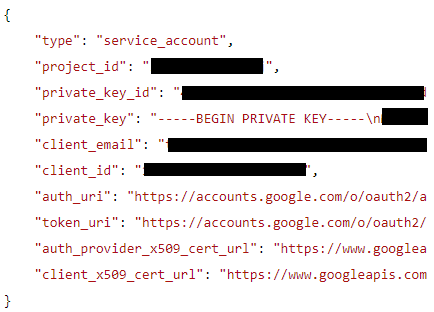 \
To read and write files from Cloud Storage:

In [ ]:
write_deltalake('gs://bucket-name/lake',
                df,
                storage_options = {'SERVICE_ACCOUNT':
                'path_file.json'})

In [ ]:
DeltaTable('gs://bucket-name/lake',
           storage_options={'SERVICE_ACCOUNT':'path_file.json'})

* ***Azure***

The path to files from accepted is: \
* az://container/path

* adl://container/path

* abfs://container/path

`storage_options`:

AZURE_STORAGE_ACCOUNT_NAME \
AZURE_STORAGE_CONNECTION_STRING \
AZURE_STORAGE_ACCOUNT_KEY

You can see the source code with all parameters [here](https://github.com/delta-io/delta-rs/blob/17999d24a58fb4c98c6280b9e57842c346b4603a/rust/src/builder.rs#L524-L539)